In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import sklearn
import os

Here we are loading the dataset which is stored in my Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading all the data set from the drive , which I can access using the above code

In [ ]:
x_train=pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/Train_60/X_Train_Data_Input.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/Train_60/Y_Train_Data_Target.csv')
x_test=pd.read_csv('/content/drive/MyDrive/Test_20/Test_20/Test_20/X_Test_Data_Input.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Test_20/Test_20/Test_20/Y_Test_Data_Target.csv')


In [ ]:
y_train.head(3)

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0


In [ ]:
y_train['target'].value_counts()

,count
target,
0,711100
1,74033


Now, we are concating the Train and test data so, that we can perform feature engineering on both simultaneously

In [ ]:
x_refine = pd.concat([x_train,x_test]).reset_index(drop=True)

In [ ]:
x_refine.tail()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
1046840,03439d629190be73a4b382325ea46547,2.0,2495,4155.0,-2.028572,0.381762,-0.007468,-0.396521,-0.015607,0.454627,...,1,0,0.001351,0.003391,0.0,0,0.0,0,0,0
1046841,10d17d09c22e9c2f77f0667a17b00d0e,0.0,1,1178.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.003390,0.0,0,0.0,0,0,0
1046842,c22938dab5fc0cfae07f3a910f2eb177,0.0,1321,1356.0,0.678139,0.701403,-0.007468,-0.369193,-0.015607,0.912784,...,0,0,0.001351,0.003390,0.0,0,0.0,0,0,0
1046843,2bda3964c16fe191fd8735850c454d26,0.0,589,1731.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.003390,0.0,0,0.0,0,0,0
1046844,277573d0424e1b062f672c2030314fba,2.0,963,14.0,0.678139,0.701403,-0.007468,-0.122341,-0.015607,1.170911,...,1,1,0.001351,0.003390,0.0,0,0.0,0,0,0


In [ ]:
x_refine=x_refine.drop('ID',axis=1)
print(x_refine.shape)

(1046845, 22)


#finding the null values of the all the columns

In [ ]:

x_refine.isnull().sum()

,0
Column0,11
Column1,0
Column2,0
Column3,168537
Column4,170420
Column5,222839
Column6,5084
Column7,0
Column8,5084
Column9,975990


##AS  COLUMN9 has 9,75,990 null values out of 10,46,845 it is better to drop the column

In [ ]:
x_refine=x_refine.drop('Column9',axis=1)

Now, let's fill a Nan values of dataframe starting with each column

In [ ]:
#for column3
print(len(x_refine['Column3'].unique()))
print(x_refine['Column3'].value_counts())

48
Column3
 0.678139    502371
-2.028572    113203
 0.001462     40524
 0.452580     38637
-0.675216     29230
 0.227021     25128
-1.351894     19910
-0.224098     16661
-1.803013     12449
-1.126335     12396
-1.577453     11162
-0.449657      9877
-0.900776      8652
 0.136797      4728
-0.404545      3126
 0.339800      2585
 0.407468      2305
-0.945887      2170
-1.487230      2149
-0.133874      1774
 0.291466      1337
-0.336877      1187
 0.377394      1079
-0.095207      1018
-1.690233       929
-1.727826       876
 0.076648       861
-1.757901       855
 0.432075       853
 0.186010       805
-1.013555       753
-0.481880       742
-1.782507       732
-1.216559       663
-1.641899       638
-1.255226       600
-0.868553       591
-0.060055       566
-1.536443       561
-1.427081       532
-0.524843       529
-0.306119       518
-0.825589       457
-1.290378       435
-0.552184       409
-0.798249       373
-1.044313       372
Name: count, dtype: int64


0    0.678139
Name: Column3, dtype: float64


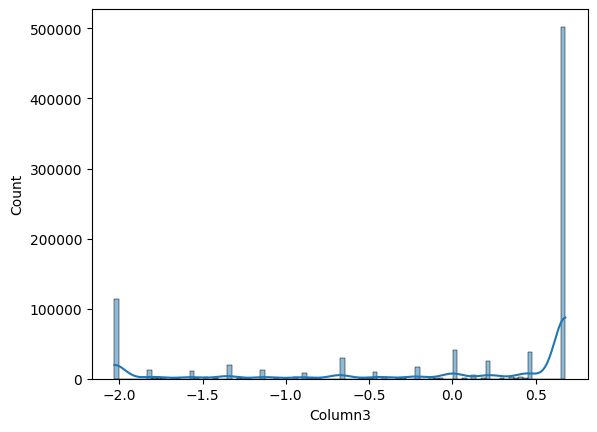

In [ ]:
sns.histplot(x='Column3',data=x_refine,kde=True)
print(x_refine['Column3'].mode())

q-q plot for checking if distribution is gaussian or not, if plot is a straight line then distribution is gaussian

((array([-4.83607811, -4.65662065, -4.55960793, ...,  4.55960793,
          4.65662065,  4.83607811]),
  array([-2.02857209, -2.02857209, -2.02857209, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

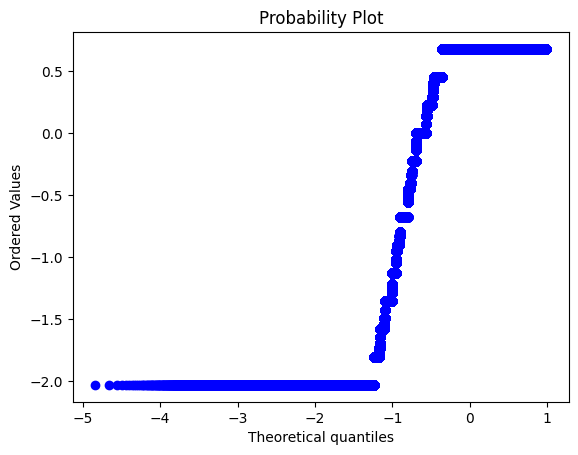

In [ ]:
stats.probplot(x_refine['Column3'], dist="norm", plot=plt)

we have discrete value for column3 so, we will fill the Nan values with mode of distribution

In [ ]:
x_refine['Column3']=x_refine['Column3'].fillna(x_refine['Column3'].mode()[0])
x_refine['Column3'].isnull().sum()

0

In [ ]:
#for column4
print(len(x_refine['Column4'].unique()))
## so, we will fill the missing value with mode here also
x_refine['Column4']=x_refine['Column4'].fillna(x_refine['Column4'].mode()[0])
x_refine['Column4'].isnull().sum()

48


0

In [ ]:
#for column5
print(len(x_refine['Column5'].unique()))

183774


<Axes: ylabel='Column5'>

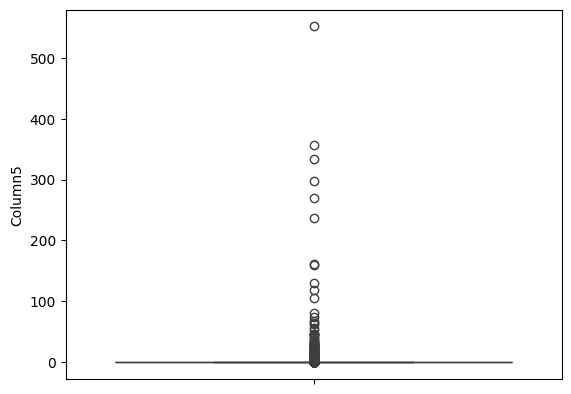

In [ ]:
sns.boxplot(y='Column5',data=x_refine)

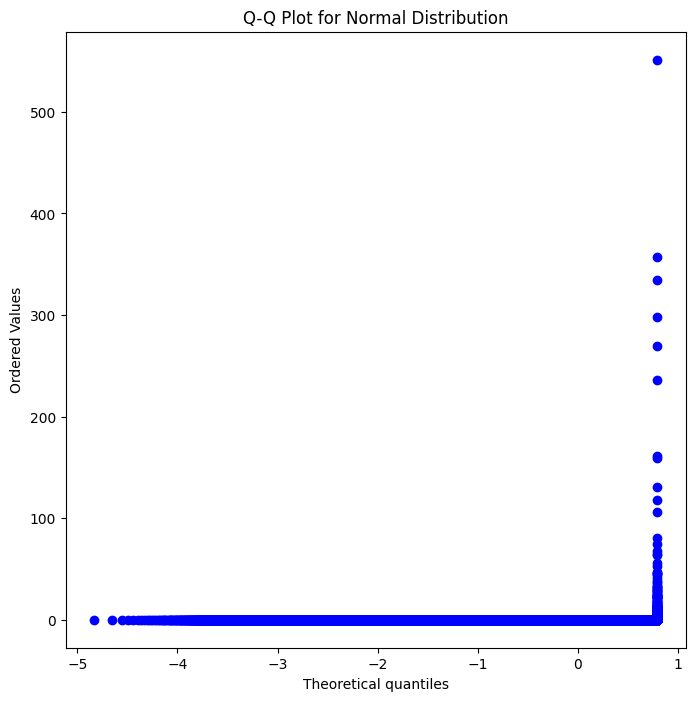

In [ ]:
plt.figure(figsize=(8, 8))
stats.probplot(x_refine['Column5'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normal Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-4.83607811, -4.65662065, -4.55960793, ...,  4.55960793,
          4.65662065,  4.83607811]),
  array([-8.2364205, -7.7246106, -7.2577897, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

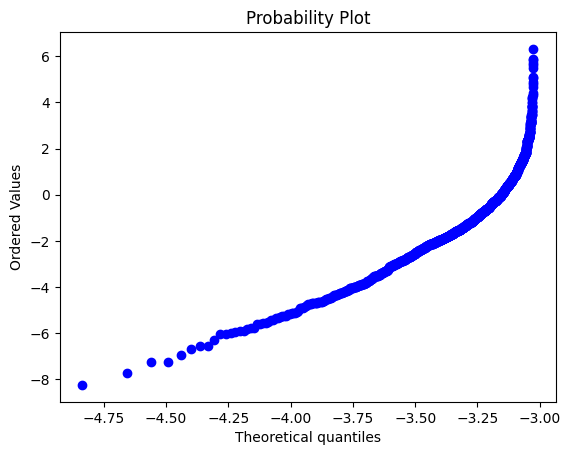

In [ ]:
x_refine['Column5']=np.log(x_refine['Column5'])
stats.probplot(x_refine['Column5'], dist="norm", plot=plt)

<Axes: ylabel='Column5'>

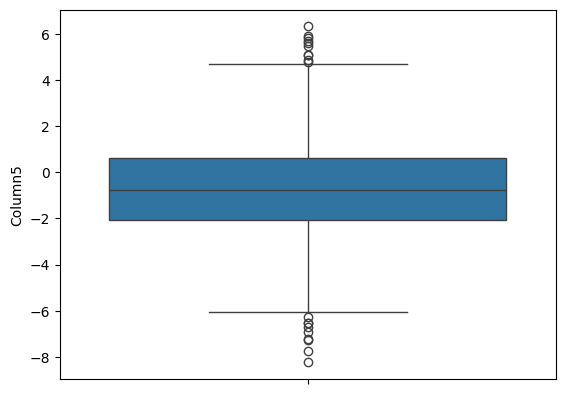

In [ ]:
sns.boxplot(y='Column5',data=x_refine)

filling the null values of column5 with median as there are outliers in the data

In [ ]:
x_refine['Column5']=x_refine['Column5'].fillna(x_refine['Column5'].median())
x_refine['Column5'].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-4.83607811, -4.65662065, -4.55960793, ...,  4.55960793,
          4.65662065,  4.83607811]),
  array([-10.95290677, -10.95290677, -10.21138915, ...,          nan,
                  nan,          nan])),
 (nan, nan, nan))

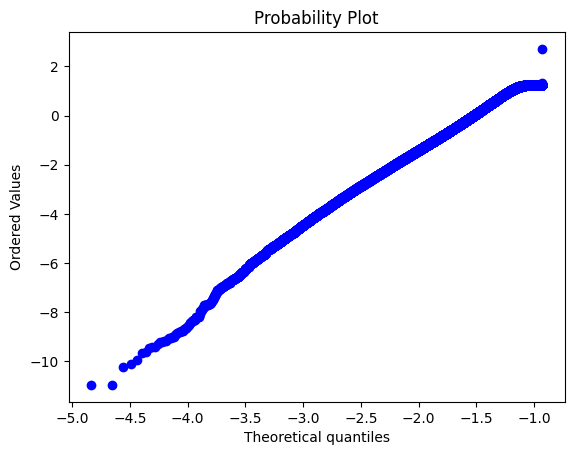

In [ ]:
x_refine['Column6']=np.log(x_refine['Column6'])
stats.probplot(x_refine['Column6'], dist="norm", plot=plt)

#We will fill the missing values of column6 by mode value because one value is arising 500k times out of 700k so, it is reasonable here to fill mode

In [ ]:
x_refine['Column6']=x_refine['Column6'].fillna(x_refine['Column6'].mean())

((array([-4.83607811, -4.65662065, -4.55960793, ...,  4.55960793,
          4.65662065,  4.83607811]),
  array([-0.77497916, -0.77497916, -0.77497916, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

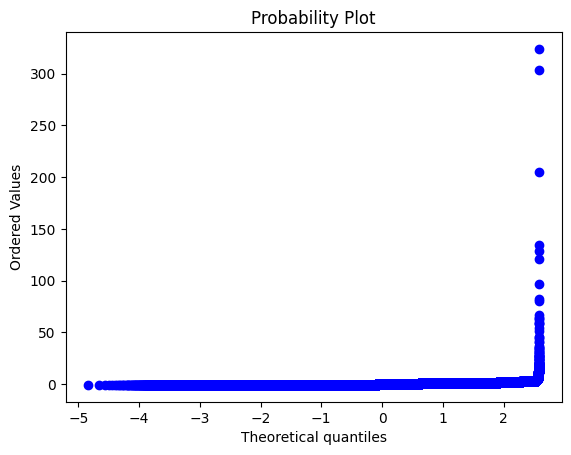

In [ ]:
a=x_refine['Column8'].copy()

stats.probplot(x_refine['Column8'], dist="norm", plot=plt)

Apply log transformation

((array([-4.83607811, -4.65662065, -4.55960793, ...,  4.55960793,
          4.65662065,  4.83607811]),
  array([-12.3482996 , -12.07055445, -11.67512599, ...,          nan,
                  nan,          nan])),
 (nan, nan, nan))

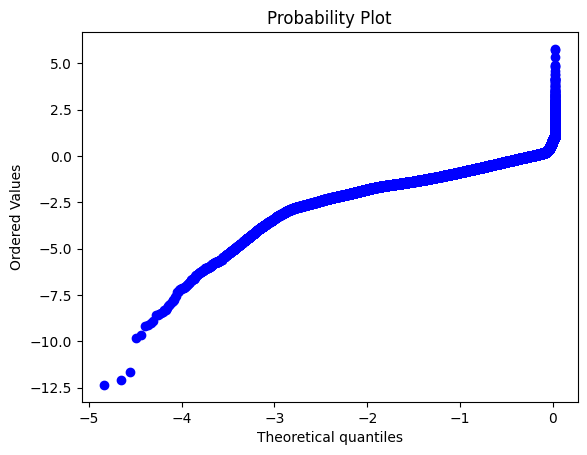

In [ ]:
transformed_data=np.log(a)
a_tans = transformed_data
stats.probplot(a_tans,dist='norm',plot=plt)

<Axes: ylabel='Column8'>

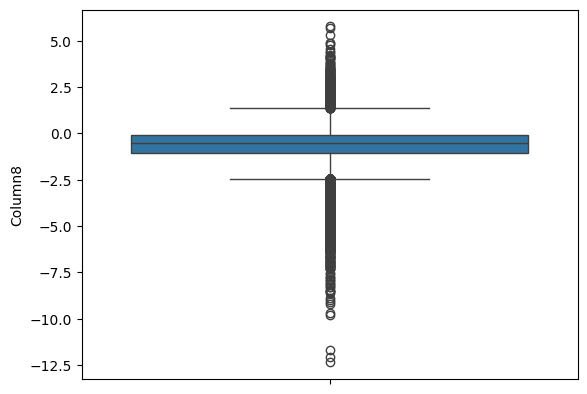

In [ ]:
sns.boxplot(a_tans)

<Axes: xlabel='Column8', ylabel='Count'>

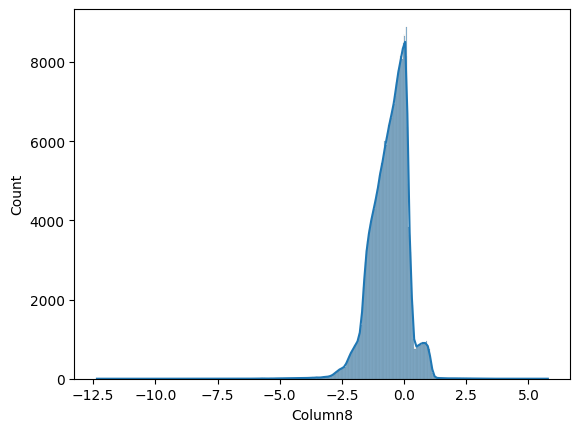

In [ ]:
sns.histplot(a_tans,kde=True)

so, Here in this scenario we will choose median value for skewed and outlier data set

In [ ]:
x_refine['Column8']=x_refine['Column8'].fillna(x_refine['Column8'].median())

In [ ]:
null_value_column=[col for col in x_refine.columns if x_refine[col].isnull().any()]
print(null_value_column)

['Column0', 'Column14', 'Column15']


Now , we will handle null values for Column0

<Axes: xlabel='Column0', ylabel='Count'>

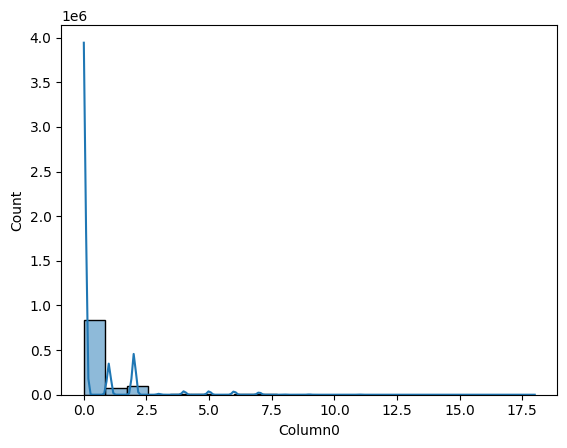

In [ ]:
c0=x_refine['Column0'].copy()
sns.histplot(c0,kde=True)

In [ ]:
c0.value_counts().head(2)

,count
Column0,
0.0,839612
2.0,98211


filling the nan values with mode value

In [ ]:
x_refine['Column0']=x_refine['Column0'].fillna(x_refine['Column0'].mode()[0])

Handling null value for Column14

Column14
0.001351    181691
0.001351     46559
0.001351      6661
0.001351      4331
0.001351      3411
             ...  
0.001350         1
0.001354         1
0.001350         1
0.001351         1
0.001350         1
Name: count, Length: 50135, dtype: int64


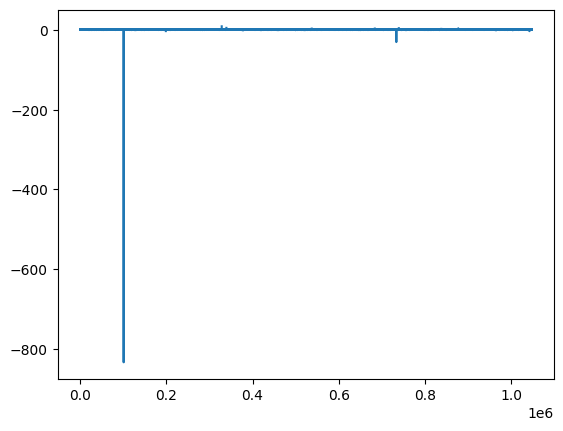

In [ ]:
c14=x_refine['Column14'].copy()
plt.plot(c14)
print(c14.value_counts())

filling this column with mode values

In [ ]:
x_refine['Column14']=x_refine['Column14'].fillna(x_refine['Column14'].mode()[0])

Now, for Column15 we fill null value with mode because it having discrete number frequency

In [ ]:
c15=x_refine['Column15'].copy()
x_refine['Column15']=x_refine['Column15'].fillna(x_refine['Column15'].mode()[0])

In [ ]:
x_refine.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.76472,-0.834273,-0.015603,0.606265,0,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.76472,0.441474,-0.015574,0.329946,0,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.76472,0.101568,-0.015607,-0.774979,1,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,0.0,211,59.0,0.678139,0.701403,-0.76472,0.101568,-0.015607,-0.774979,0,...,0,0,0.001351,0.00339,0.0,0,1.0,0,0,0
4,0.0,718,950.0,-2.028572,-1.855728,-0.76472,0.101568,-0.015607,-0.774979,0,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


#Heamap to show correlation of various columns

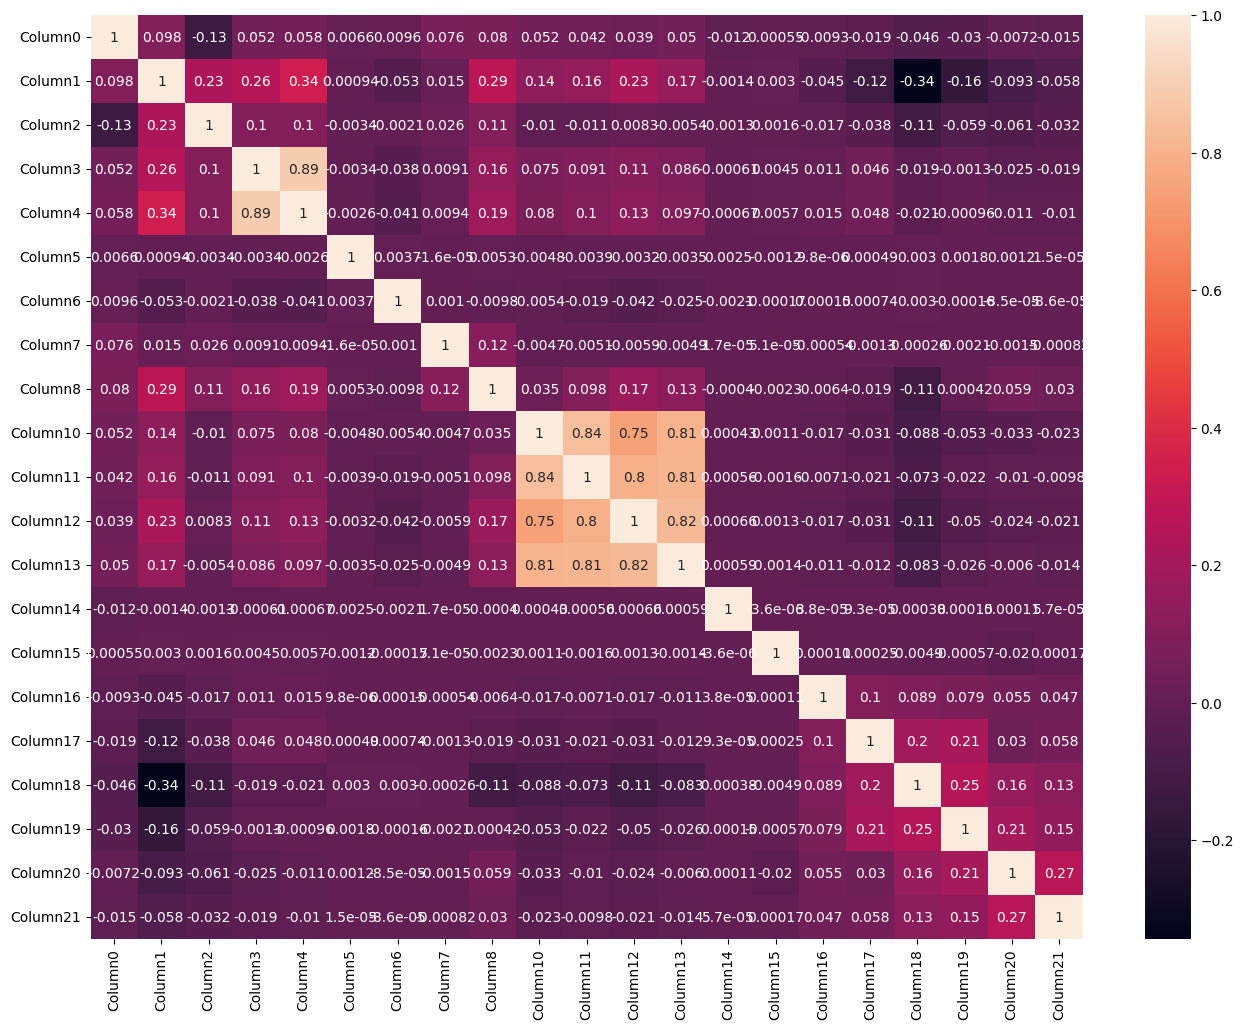

In [ ]:
corr_matrix=x_refine.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Again separating x_train and x_test from combined dataframe

In [ ]:
X_train_encoded = x_refine.iloc[:x_train.shape[0]]
X_test_encoded =  x_refine.iloc[x_train.shape[0]:]
print(X_train_encoded.isna().sum())

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


Dropping the ID column

In [ ]:
y_train_encoded = y_train.drop('ID',axis=1)
y_test_encoded = y_test.drop('ID',axis=1)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(785133, 1)
(261712, 1)


Now we will perform feature scaling both standardization and normalization

standarization scales data such data mean of data is 0 and standard deviation is 1

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_encoded_ss=ss.fit_transform(X_train_encoded)
x_test_encoded_ss=ss.transform(X_test_encoded)
x_train_encoded_ss=pd.DataFrame(x_train_encoded_ss,columns=X_train_encoded.columns)
x_test_encoded_ss=pd.DataFrame(x_test_encoded_ss,columns=X_test_encoded.columns)
x_train_encoded_ss.head(2)

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,1.340402,1.293126,0.361489,0.599636,0.61809,-0.000145,-1.711649,-0.015613,0.574665,-0.562836,...,-0.755089,-0.699089,0.001253,0.003259,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584
1,-0.378891,1.293126,0.234572,0.362026,0.61809,-0.000145,0.622432,-0.015586,0.312555,-0.562836,...,-0.755089,-0.699089,0.001253,0.003259,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584


##Here I am performing normalization using minmaxscalar (it convert data into range of [0,1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_encoded_mms=mms.fit_transform(X_train_encoded)
x_test_encoded_mms=mms.transform(X_test_encoded)
x_train_encoded_mms=pd.DataFrame(x_train_encoded_mms,columns=X_train_encoded.columns)
x_test_encoded_mms=pd.DataFrame(x_test_encoded_mms,columns=X_test_encoded.columns)
x_train_encoded_mms.head(2)

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,0.111111,0.998882,0.365000,1.000000,1.0,0.513557,0.740749,2.300930e-08,0.004253,0.0,...,0.0,0.0,0.989881,0.999991,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.998882,0.338686,0.916667,1.0,0.513557,0.834141,1.665141e-07,0.003402,0.0,...,0.0,0.0,0.989881,0.999991,0.0,0.0,0.0,0.0,0.0,0.0


Now we will import all the models and start builing our machine learning model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

This is function to fit the model and predict the values and various evaluation metrics

In [ ]:
def score(model,x_train,x_test,y_train,y_test):  ## i have removed name="Defautl"
    a=model.fit(x_train,y_train)
    y_predict = a.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    cr=classification_report(y_test,y_predict)
    acc=accuracy_score(y_test,y_predict)
    roc=roc_auc_score(y_test,y_predict)
    print(cm)
    print(cr)
    print('accuracy is {}'.format(acc))
    print('roc_auc_score is {}'.format(roc))




In [ ]:
LG = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
base_estimator = DecisionTreeClassifier(max_depth=1)
AB = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
NB = GaussianNB()

MODELS = [LG, DTC, AB]
NAME = ["Logistic Regression", "Decision Tree Classifier" "Random Forest", "AdaBoostClassifier"]

Testing Logistic regression

In [ ]:
score(LG,x_train_encoded_ss,x_test_encoded_ss,y_train_encoded,y_test_encoded)

[[231868   5166]
 [  2864  21814]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.81      0.88      0.84     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.93      0.91    261712
weighted avg       0.97      0.97      0.97    261712

accuracy is 0.9693174176193678
roc_auc_score is 0.9310754363104828


Testing Decision Tree classifier

In [ ]:
##Testing Decision tree classifier
score(DTC,x_train_encoded_ss,x_test_encoded_ss,y_train_encoded,y_test_encoded)

[[232882   4152]
 [  4241  20437]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    237034
           1       0.83      0.83      0.83     24678

    accuracy                           0.97    261712
   macro avg       0.91      0.91      0.91    261712
weighted avg       0.97      0.97      0.97    261712

accuracy is 0.9679303967720242
roc_auc_score is 0.9053150264207125


Testing AdaBoost algorithm

In [ ]:
score(AB,x_train_encoded_ss,x_test_encoded_ss,y_train_encoded,y_test_encoded)

[[232021   5013]
 [  1509  23169]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.82      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712

accuracy is 0.9750794766766522
roc_auc_score is 0.9588517772194678


providing normalized data to knn

#Model Evaluation Reprort



Among the Selected models above AdaBoost alogorithm is performing the Best in terms of all the evaluation metrics

So, we will select AdaBoost algorithm and Build our model

#Fine tuning our model to find best Parameter to use

In [ ]:
from sklearn.model_selection import GridSearchCV
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [ 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1,], # Step size shrinkage
    'base_estimator__max_depth': [2, 3]  # Hyperparameters for the base estimator
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost,
                           param_grid=param_grid,
                           cv=3,  # Number of cross-validation folds
                           scoring='accuracy',  # Evaluation metric
                           n_jobs=-1,  # Use all available cores
                           verbose=1)  # Verbosity level
# Fit GridSearchCV to the training data
grid_search.fit(x_train_encoded_ss, y_train_encoded)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:  {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 150}


Now Inserting the Best parameters in the model

In [ ]:
mx_dp=DecisionTreeClassifier(max_depth=3)
model=AdaBoostClassifier(base_estimator=mx_dp, n_estimators=150, learning_rate=0.1)
model_fit=model.fit(x_train_encoded_ss,y_train_encoded)
y_pred=model_fit.predict(x_test_encoded_ss)


In [ ]:
print('Accuracy of our model:{}'.format(accuracy_score(y_test_encoded,y_pred)))
print('roc_auc_score of our model:{}'.format(roc_auc_score(y_test_encoded,y_pred)))

Accuracy of our model:0.9763518677019013
roc_auc_score of our model:0.9638379760545387


In [57]:
from google.colab import files
y_pred=pd.DataFrame(y_pred)
y_pred.to_csv('final.csv')
files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.95      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



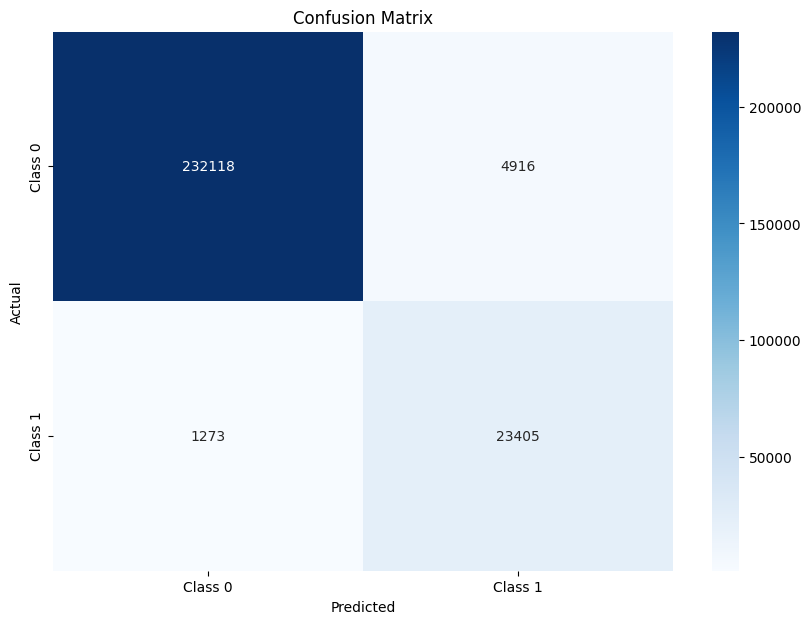

In [56]:
confusion_mat=confusion_matrix(y_test_encoded,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat, annot=True,fmt='d', cmap='Blues', cbar=True, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#As one can observe from the above confusion matrix
1) our True Positives and True negatives are significant in numbers

2) our model is providing us least number of False positives